In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
df = pd.read_csv('car_insurance.csv')

In [90]:
sample_df = df.sample(n=1000)  # Change the value of n as per your requirement
sample_df.to_csv('sample_df.csv', index=False)

In [73]:
#cleaning the data

def clean_data(df):
    # Change column type to object for column: 'id'
    df = df.astype({'id': 'object'})
    # Derive column 'driving_exp_clean' from column: 'driving_experience'
    # Transform based on the following examples:
    #    driving_experience    Output
    # 1: "0-9y"             => "0-9"
    # 2: "10-19y"           => "10-19"
    # 3: "30y+"             => "30+"
    df.insert(4, "driving_exp_clean", df["driving_experience"].str.replace("y", ""))
    # Drop column: 'driving_experience'
    df = df.drop(columns=['driving_experience'])
    # Replace missing values with the mean of each column in: 'credit_score'
    df = df.fillna({'credit_score': df['credit_score'].mean()})
    # Change column type to int32 for column: 'children'
    df = df.astype({'children': 'int32'})
    # Drop column: 'postal_code'
    df = df.drop(columns=['postal_code'])
    # Replace missing values with the mean of each column in: 'annual_mileage'
    df = df.fillna({'annual_mileage': df['annual_mileage'].mean()})
    # Change column type to category for column: 'age'
    df = df.astype({'age': 'category'})
    # Change column type to category for column: 'gender'
    df = df.astype({'gender': 'category'})
    # Change column type to category for column: 'driving_exp_clean'
    df = df.astype({'driving_exp_clean': 'category'})
    # Change column type to category for column: 'education'
    df = df.astype({'education': 'category'})
    # Change column type to category for column: 'income'
    df = df.astype({'income': 'category'})
    # Change column type to category for column: 'vehicle_ownership'
    df = df.astype({'vehicle_ownership': 'category'})
    # Change column type to category for column: 'vehicle_year'
    df = df.astype({'vehicle_year': 'category'})
    # Change column type to category for column: 'married'
    df = df.astype({'married': 'category'})
    # Change column type to category for column: 'vehicle_type'
    df = df.astype({'vehicle_type': 'category'})
    return df

# Loaded variable 'df' from URI: c:\Users\mubia\OneDrive\Desktop\Data Science\Insurance\Insurance_claims\Code\Data_Acquisition_and_Understanding\car_insurance.csv
df = pd.read_csv(r'c:\\Users\\mubia\\OneDrive\\Desktop\\Data Science\\Insurance\\Insurance_claims\\Code\\Data_Acquisition_and_Understanding\\car_insurance.csv')

df_clean = clean_data(df.copy())
df_clean.head()

,id,age,gender,driving_exp_clean,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,annual_mileage,vehicle_type,speeding_violations,duis,past_accidents,outcome
0,569520,3,0,0-9,high school,upper class,0.629027,1.0,after 2015,0.0,1,12000.0,sedan,0,0,0,0.0
1,750365,0,1,0-9,none,poverty,0.357757,0.0,before 2015,0.0,0,16000.0,sedan,0,0,0,1.0
2,199901,0,0,0-9,high school,working class,0.493146,1.0,before 2015,0.0,0,11000.0,sedan,0,0,0,0.0
3,478866,0,1,0-9,university,working class,0.206013,1.0,before 2015,0.0,1,11000.0,sedan,0,0,0,0.0
4,731664,1,1,10-19,none,working class,0.388366,1.0,before 2015,0.0,0,12000.0,sedan,2,0,1,1.0


In [91]:
#create a sample of df_clean and call it processed_sample, 1000 rows and export it
processed_sample = df_clean.sample(n=1000)
processed_sample.to_csv('processed_sample.csv', index=False)

In [74]:
df_clean.columns

Index(['id', 'age', 'gender', 'driving_exp_clean', 'education', 'income',
       'credit_score', 'vehicle_ownership', 'vehicle_year', 'married',
       'children', 'annual_mileage', 'vehicle_type', 'speeding_violations',
       'duis', 'past_accidents', 'outcome'],
      dtype='object')

In [75]:
df_clean['age'].value_counts()

age
1    3063
2    2931
0    2016
3    1990
Name: count, dtype: int64

<Axes: xlabel='age', ylabel='Count'>

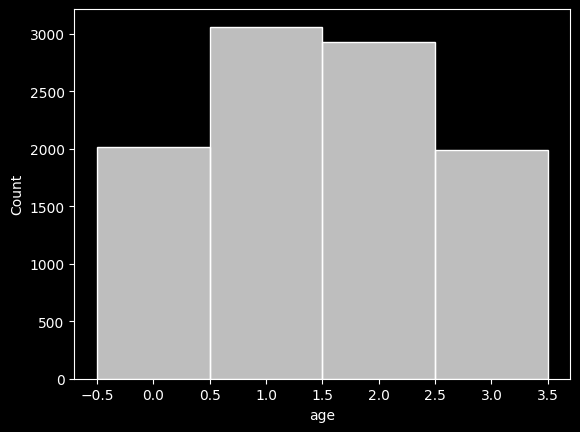

In [76]:
# Exploratory Data Analysis, white background
sns.histplot(df_clean['age'],bins=4, color='white')

<Axes: xlabel='driving_exp_clean', ylabel='Count'>

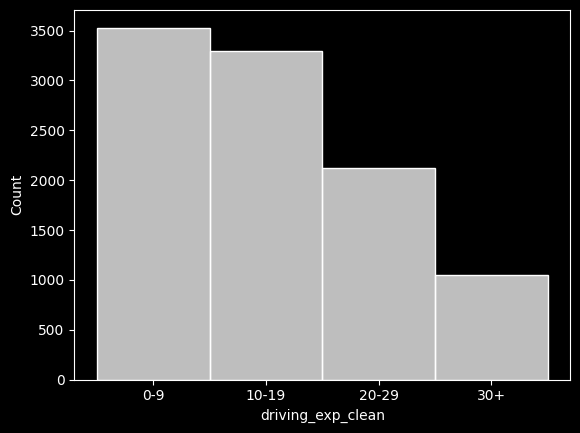

In [77]:
sns.histplot(x='driving_exp_clean', data=df_clean, bins=4, color='white')

<Axes: xlabel='education', ylabel='Count'>

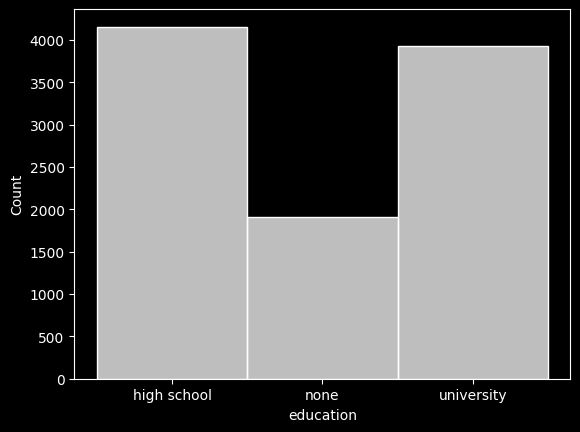

In [78]:
#histplot the education column
sns.histplot(x='education', data=df_clean, color='white')

<Axes: xlabel='income', ylabel='Count'>

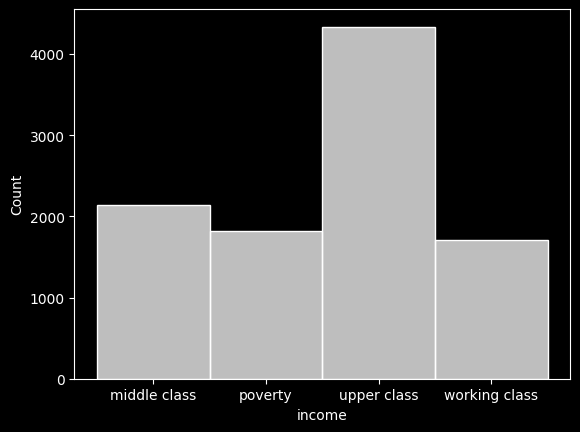

In [79]:
#histplot the income column
sns.histplot(x='income', data=df_clean, color='white')

<Axes: xlabel='credit_score'>

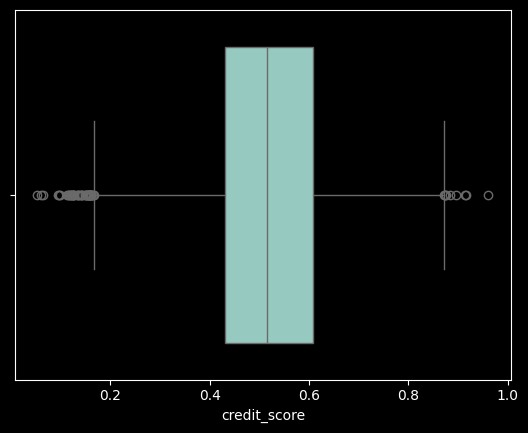

In [80]:
#boxplot the credit_score column
sns.boxplot(x='credit_score', data=df_clean)

Reminder to remove outliers in the credit_score column

<Axes: xlabel='annual_mileage'>

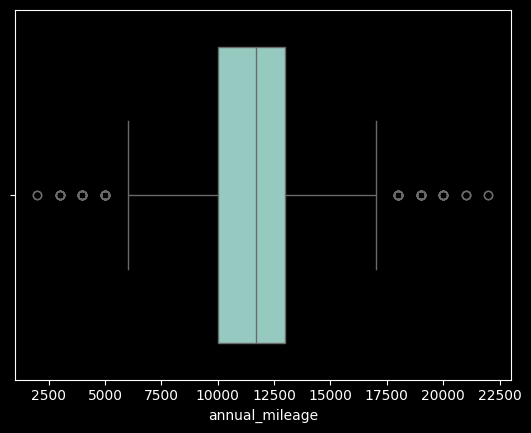

In [81]:
#boxplot the annual_mileage column
sns.boxplot(x='annual_mileage', data=df_clean)

In [82]:
df_clean

,id,age,gender,driving_exp_clean,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,annual_mileage,vehicle_type,speeding_violations,duis,past_accidents,outcome
0,569520,3,0,0-9,high school,upper class,0.629027,1.0,after 2015,0.0,1,12000.000000,sedan,0,0,0,0.0
1,750365,0,1,0-9,none,poverty,0.357757,0.0,before 2015,0.0,0,16000.000000,sedan,0,0,0,1.0
2,199901,0,0,0-9,high school,working class,0.493146,1.0,before 2015,0.0,0,11000.000000,sedan,0,0,0,0.0
3,478866,0,1,0-9,university,working class,0.206013,1.0,before 2015,0.0,1,11000.000000,sedan,0,0,0,0.0
4,731664,1,1,10-19,none,working class,0.388366,1.0,before 2015,0.0,0,12000.000000,sedan,2,0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,323164,1,0,10-19,university,upper class,0.582787,1.0,before 2015,0.0,0,16000.000000,sedan,0,0,1,0.0
9996,910346,1,0,10-19,none,middle class,0.522231,1.0,after 2015,0.0,1,11697.003207,sedan,1,0,0,0.0
9997,468409,1,1,0-9,high school,middle class,0.470940,1.0,before 2015,0.0,1,14000.000000,sedan,0,0,0,0.0
9998,903459,1,0,10-19,high school,poverty,0.364185,0.0,before 2015,0.0,1,13000.000000,sedan,2,0,1,1.0


In [83]:
#average credit score for vehicle ownership
df_clean.groupby('vehicle_ownership')['credit_score'].mean()

C:\Users\mubia\AppData\Local\Temp\ipykernel_14864\1556703510.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_clean.groupby('vehicle_ownership')['credit_score'].mean()


vehicle_ownership
0.0    0.457178
1.0    0.541303
Name: credit_score, dtype: float64

In [84]:
#which vehicle_year has the most 1.0 outcome
df_clean.groupby('vehicle_year')['outcome'].value_counts()


C:\Users\mubia\AppData\Local\Temp\ipykernel_14864\309722920.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_clean.groupby('vehicle_year')['outcome'].value_counts()


vehicle_year  outcome
after 2015    0.0        2710
              1.0         323
before 2015   0.0        4157
              1.0        2810
Name: count, dtype: int64

In [85]:
#group by vehicle ownership and outcome
df_clean.groupby('vehicle_ownership')['outcome'].value_counts()

C:\Users\mubia\AppData\Local\Temp\ipykernel_14864\1021630457.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_clean.groupby('vehicle_ownership')['outcome'].value_counts()


vehicle_ownership  outcome
0.0                1.0        1757
                   0.0        1273
1.0                0.0        5594
                   1.0        1376
Name: count, dtype: int64

In [86]:
#remove outliers in the credit_score column for df_clean with function
def remove_outliers_credit(df):
    # Calculate Q1 (25th percentile of the data) for column: 'credit_score'
    Q1 = df['credit_score'].quantile(0.25)
    # Calculate Q3 (75th percentile of the data) for column: 'credit_score'
    Q3 = df['credit_score'].quantile(0.75)
    # Calculate IQR for column: 'credit_score'
    IQR = Q3 - Q1
    # Filter rows where column: 'credit_score' is within 1.5*IQR of Q1 and Q3
    df = df[(df['credit_score'] >= Q1 - 1.5*IQR) & (df['credit_score'] <= Q3 + 1.5*IQR)]
    return df

In [87]:
#use the function
df_clean = remove_outliers_credit(df_clean)
df_clean['credit_score'].info()

<class 'pandas.core.series.Series'>
Index: 9943 entries, 0 to 9999
Series name: credit_score
Non-Null Count  Dtype  
--------------  -----  
9943 non-null   float64
dtypes: float64(1)
memory usage: 155.4 KB


In [88]:
#remove outliers in the annual_mileage column for df_clean with function
def remove_outliers_mileage(df):
    # Calculate Q1 (25th percentile of the data) for column: 'annual_mileage'
    Q1 = df['annual_mileage'].quantile(0.25)
    # Calculate Q3 (75th percentile of the data) for column: 'annual_mileage'
    Q3 = df['annual_mileage'].quantile(0.75)
    # Calculate IQR for column: 'annual_mileage'
    IQR = Q3 - Q1
    # Filter rows where column: 'annual_mileage' is within 1.5*IQR of Q1 and Q3
    df = df[(df['annual_mileage'] >= Q1 - 1.5*IQR) & (df['annual_mileage'] <= Q3 + 1.5*IQR)]
    return df

In [89]:
#use the function
df_clean = remove_outliers_mileage(df_clean)
df_clean['annual_mileage'].info()

<class 'pandas.core.series.Series'>
Index: 9671 entries, 0 to 9999
Series name: annual_mileage
Non-Null Count  Dtype  
--------------  -----  
9671 non-null   float64
dtypes: float64(1)
memory usage: 151.1 KB


In [92]:
df_clean

,id,age,gender,driving_exp_clean,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,annual_mileage,vehicle_type,speeding_violations,duis,past_accidents,outcome
0,569520,3,0,0-9,high school,upper class,0.629027,1.0,after 2015,0.0,1,12000.000000,sedan,0,0,0,0.0
1,750365,0,1,0-9,none,poverty,0.357757,0.0,before 2015,0.0,0,16000.000000,sedan,0,0,0,1.0
2,199901,0,0,0-9,high school,working class,0.493146,1.0,before 2015,0.0,0,11000.000000,sedan,0,0,0,0.0
3,478866,0,1,0-9,university,working class,0.206013,1.0,before 2015,0.0,1,11000.000000,sedan,0,0,0,0.0
4,731664,1,1,10-19,none,working class,0.388366,1.0,before 2015,0.0,0,12000.000000,sedan,2,0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,323164,1,0,10-19,university,upper class,0.582787,1.0,before 2015,0.0,0,16000.000000,sedan,0,0,1,0.0
9996,910346,1,0,10-19,none,middle class,0.522231,1.0,after 2015,0.0,1,11697.003207,sedan,1,0,0,0.0
9997,468409,1,1,0-9,high school,middle class,0.470940,1.0,before 2015,0.0,1,14000.000000,sedan,0,0,0,0.0
9998,903459,1,0,10-19,high school,poverty,0.364185,0.0,before 2015,0.0,1,13000.000000,sedan,2,0,1,1.0


In [95]:
df_clean["annual_mileage"] = df_clean["annual_mileage"].round(1)

In [96]:
df_clean

,id,age,gender,driving_exp_clean,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,annual_mileage,vehicle_type,speeding_violations,duis,past_accidents,outcome
0,569520,3,0,0-9,high school,upper class,0.629027,1.0,after 2015,0.0,1,12000.0,sedan,0,0,0,0.0
1,750365,0,1,0-9,none,poverty,0.357757,0.0,before 2015,0.0,0,16000.0,sedan,0,0,0,1.0
2,199901,0,0,0-9,high school,working class,0.493146,1.0,before 2015,0.0,0,11000.0,sedan,0,0,0,0.0
3,478866,0,1,0-9,university,working class,0.206013,1.0,before 2015,0.0,1,11000.0,sedan,0,0,0,0.0
4,731664,1,1,10-19,none,working class,0.388366,1.0,before 2015,0.0,0,12000.0,sedan,2,0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,323164,1,0,10-19,university,upper class,0.582787,1.0,before 2015,0.0,0,16000.0,sedan,0,0,1,0.0
9996,910346,1,0,10-19,none,middle class,0.522231,1.0,after 2015,0.0,1,11697.0,sedan,1,0,0,0.0
9997,468409,1,1,0-9,high school,middle class,0.470940,1.0,before 2015,0.0,1,14000.0,sedan,0,0,0,0.0
9998,903459,1,0,10-19,high school,poverty,0.364185,0.0,before 2015,0.0,1,13000.0,sedan,2,0,1,1.0


In [97]:
#export df_clean as car_insurance_cleaned csv
df_clean.to_csv('car_insurance_cleaned.csv', index=False)